## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## DATA UNDERSTANDING & CLEANING

***Import the necessary libraries***

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import seaborn as sns
#Import Numpy and the Pandas Package
import numpy as np
import pandas as pd
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import StatsModel
import scipy.stats as stats
import statsmodels.api as sm

***Read the kc_house_data.csv***

In [30]:
data = pd.read_csv('C:/Users/user/Documents/PROJECT1/dsc-phase-2-project-v2-3/data/kc_house_data.csv', index_col=0)

# Display the head of the data
print(data.head())

                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   

            floors waterfront  view  condition          grade  sqft_above  \
id                                                                          
7129300520     1.0        NaN  NONE    Average      7 Average        1180   
6414100192     2.0         NO  NONE    Average      7 Average        2170   
5631500400     1.0         NO  NONE    Average  6 Low Average         770   
2487200875     1.0         NO  NONE  Very Good      7 

In [31]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [33]:
data.shape

(21597, 20)

 - The data is loaded from a CSV file named "kc_house_data.csv" into a Pandas DataFrame.
 - It has 20 columns with 21597 rows
 - The data contains missing values in the columns : waterfront, view, yr_renovated and zipcode
 - Waterfront, view, and year-renovated are the only columns with missing values
 -The following variables had a strong positive correlation with price: * sqft_living, sqft_above, sqft_living15, and bathrooms
 
 

***Clean the kc_house_data.csv dataset***

In [34]:
# 1. Convert 'date' to a datetime object
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [35]:
# 2. Check for duplicates
duplicates_with_rows = data[data.duplicated()]
duplicates_with_rows

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [36]:
# 3. Handle missing values in sqft_living to fill missing values with the mean:
data['sqft_living'] = data['sqft_living'].fillna(data['sqft_living'].mean())

In [37]:
data.dropna(inplace = True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 6414100192 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15762 non-null  datetime64[ns]
 1   price          15762 non-null  float64       
 2   bedrooms       15762 non-null  int64         
 3   bathrooms      15762 non-null  float64       
 4   sqft_living    15762 non-null  int64         
 5   sqft_lot       15762 non-null  int64         
 6   floors         15762 non-null  float64       
 7   waterfront     15762 non-null  object        
 8   view           15762 non-null  object        
 9   condition      15762 non-null  object        
 10  grade          15762 non-null  object        
 11  sqft_above     15762 non-null  int64         
 12  sqft_basement  15762 non-null  object        
 13  yr_built       15762 non-null  int64         
 14  yr_renovated   15762 non-null  float64       
 15  zipco

 ***How we handled missing values in each column***
 - We found no duplicate rows
 - Then missing values in the column sqft_living were filled with the average value
 - Since the other column didn't have enough data to fill the missing values we dropped those rows

***Read the column_names.md***

In [39]:
with open('C:/Users/user/Documents/PROJECT1/dsc-phase-2-project-v2-3/data/column_names.md', 'r') as file:
    md_lines = file.readlines()

df = pd.DataFrame({'Text': md_lines})

df.head()


,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n


In [40]:
df.shape

(26, 1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


 - The dataset has only one column and 26 rows
 - Each row is aligned to the columns in kc_house_data.csv entailing the column's descriptions 

***Clean the columns_name.md dataset***

In [42]:
df.head()

,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n


In [43]:
df[['Column name', 'Descriptions']] = df['Text'].str.split('-', n=1, expand=True)

In [44]:
# Drop the original 'Text' column
df.drop(columns=['Text'], inplace=True)

In [45]:
# Remove rows where 'Descriptions' column contains 'None'
df = df[df['Descriptions'].notna()]

In [46]:
# Remove asterisks from 'Column name' column
df['Column name'] = df['Column name'].str.replace('*', '').str.strip()

# Remove leading and trailing whitespaces from 'Descriptions' column
df['Descriptions'] = df['Descriptions'].str.strip()

In [47]:
df_duplicates = df[df.duplicated()]
df_duplicates

,Column name,Descriptions


In [48]:
df

,Column name,Descriptions
1,`id`,Unique identifier for a house
2,`date`,Date house was sold
3,`price`,Sale price (prediction target)
4,`bedrooms`,Number of bedrooms
5,`bathrooms`,Number of bathrooms
6,`sqft_living`,Square footage of living space in the home
7,`sqft_lot`,Square footage of the lot
8,`floors`,Number of floors (levels) in house
9,`waterfront`,Whether the house is on a waterfront
11,`view`,Quality of view from house


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 25
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column name   21 non-null     object
 1   Descriptions  21 non-null     object
dtypes: object(2)
memory usage: 504.0+ bytes


In [50]:
df.shape

(21, 2)

 - The dataset had one column that had two columns inside it, so we split each row using dash as the separator (-)
 - Thus we ended up having two columns : Column Names and Descriptions

# Exploratory Data Analysis

## check for outliers

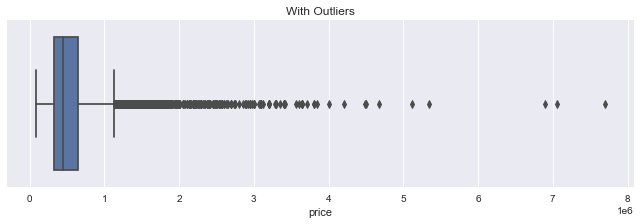

In [51]:
# An outlier is an obervation that lies in an abnormal distance from other values
# Outliers affect the data quality and hence the accuracy of the final model
# Checking for ouutliers is, therefore, vital before proceeding to the next step in the project
# In this case, we check for the outliers using a box plot

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers")

## Deal with Outliers

An outlier is an obervation that lies in an abnormal distance from other values.
Outliers affect the data quality and hence the accuracy of the final model.
You can deal with the outliers by removing them to improve the quality of the model.

In [52]:
#I chose to use Interquartile Range (IRQ) to remove the outliers

Q75 = np.percentile(data['price'],75)
Q25 = np.percentile(data['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

df1 = data[(data['price']<upper)]
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


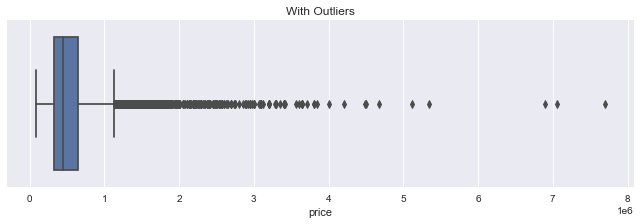

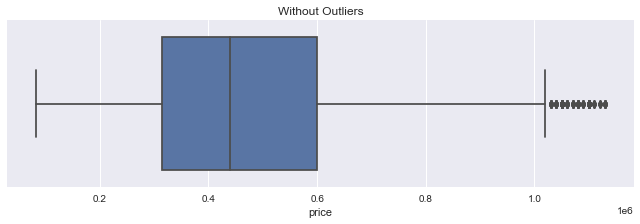

In [53]:
# Let me compare the box plots of with and without outliers
# I will plot a box plot without the outliers
# And from what we can see now, the box plot looks great

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers");
sns.catplot(x='price', data=df1, kind='box', height=3, aspect=3).set(title='Without Outliers');

# Checking for Skeweness

Removing outliers is a good way to normalizse the skewness of our graph
We assume that by removing the outliers then the graph will take a shape the look like a normal distribution

4.226727017501067


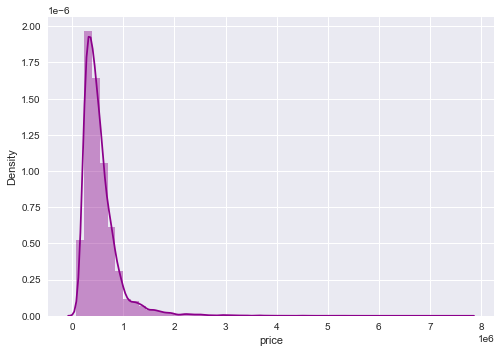

In [54]:
# Let us check the skewness of the graph before removing the outliers

sns.distplot(data.price, color='darkmagenta')
print(data['price'].skew())

0.753349812833949


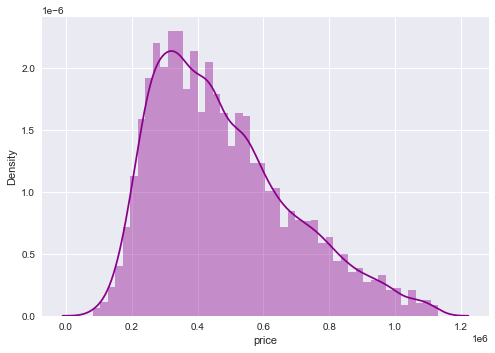

In [58]:
# Now let use see the skewness after dealing with the outliers
# Notice the differences?

sns.distplot(df1.price, color='darkmagenta') 

print(df1['price'].skew())

## Handling Non-Numeric/Categorical Variables
Non-numeric or categorical data is a great way to understand our data but not the best when it comes to linear regression
Categorical variables will cause problems to the regression model if not transformed further
Some of the categorical data in our dataset include condition, view, waterfront, and grade

# Use One-Hot Coding with Pandas
One-hot encoding is a great way to transform categorical variable in a model
I will use one-hot coding to create multiple dummy varriables for each category of condition and grade variable
I will use the pandas' get_dummies method in this approach

In [59]:
# Check the value counts for the condition variable

df1['condition'].value_counts()

Average      9681
Good         3954
Very Good    1149
Fair          129
Poor           18
Name: condition, dtype: int64

In [60]:
# We will also do this with the grade column because it will also be useful for our model

df1['grade'].value_counts()

7 Average        6531
8 Good           4355
9 Better         1699
6 Low Average    1481
10 Very Good      569
5 Fair            167
11 Excellent      109
4 Low              16
12 Luxury           3
3 Poor              1
Name: grade, dtype: int64

In [62]:
# Making a copy of the categorical variables to prepare them for one-hot encoding
copies_df = df1[["condition", "grade"]].copy()
copies_df.sample(10, random_state=1)


,condition,grade
id,,
3438500742,Good,7 Average
7215722010,Average,8 Good
2212210360,Good,7 Average
7702080110,Average,9 Better
2607730490,Average,8 Good
1250201165,Average,6 Low Average
8682301050,Average,8 Good
3204950120,Average,9 Better
7000100635,Average,6 Low Average


In [63]:
# Pandas' get_dummies offers a quick way to perform one-hot encoding 
# and return the dummy varriable to our dataframe 
# However, as you can notice, the original variable (condition) has been dropped and dummy variables added

pd.get_dummies(df1, columns=["condition", "grade"]).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,2170,...,0,0,0,0,0,0,0,1,0,0
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,1050,...,0,0,0,0,0,0,0,1,0,0
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,1680,...,0,0,0,0,0,0,0,0,1,0
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,1715,...,0,0,0,0,0,0,0,1,0,0
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,1050,...,0,0,0,0,0,0,0,1,0,0


# Avoiding the Dummy Variable Trap
Perfect multicollinearity is a problem when dealing with dummy varriables

Perfect multicollinearity is when you are able to predict one variable from all the other

One-hot ecoding dummy variables suffer from this problem

In [35]:
# Eliminating perfect multicollinearity
df_dummies = pd.get_dummies(df1, columns=["condition", "grade"], drop_first = True)
df_dummies.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,,,,
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,2170,...,0,0,0,0,0,0,0,1,0,0
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,1050,...,1,0,0,0,0,0,0,1,0,0
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,1680,...,0,0,0,0,0,0,0,0,1,0
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,1715,...,0,0,0,0,0,0,0,1,0,0
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,1050,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df_dummies.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better'],
      dtype='object')

This is the final dataset that will be used for the modelling, so lets clean it up a bit more by dropping columns that may not be needed for the modelling.

In [37]:
df_dummies.drop(columns=['lat'], inplace=True)

## Data Visualization

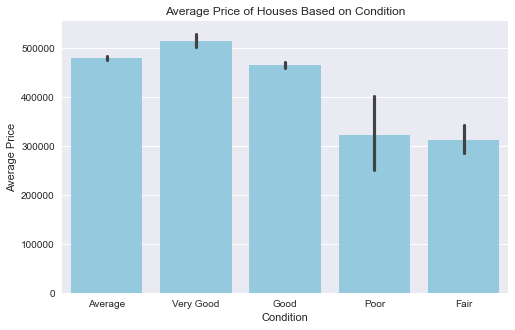

In [64]:
# Bar plot: Condition vs Average Price
plt.figure(figsize=(8, 5))
sns.barplot(x='condition', y='price', color = 'skyblue', data=df1)
plt.title('Average Price of Houses Based on Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show()

**Bar Plot (Condition vs Average Price):**

 - This plot illustrates the average price of houses based on their condition.
 - The x-axis represents the condition of the house, and the y-axis represents the average price.
 - It helps identify whether the condition of the house affects its price significantly. 
 - In this case houses in very good condition are sold with the highest prices.

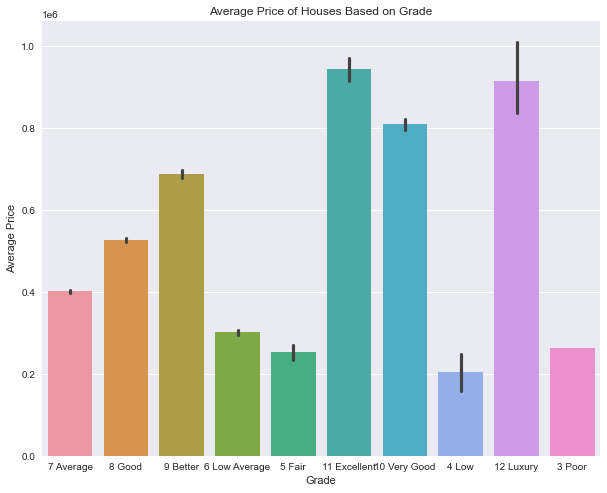

In [65]:
# Bar plot: Grade vs Average Price
plt.figure(figsize=(10, 8))
sns.barplot(x='grade', y='price', data=df1)
plt.title('Average Price of Houses Based on Grade')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.show()

**Bar Plot (Grade vs Average Price):**

 - This plot displays the average price of houses based on their grade.
 - The x-axis represents the grade of the house, and the y-axis represents the average price.
 - It helps understand how the quality of construction and design, as indicated by the grade, influences the price of houses. In ths case Grade 12 luxury houses are listed with the highest price and Grade 4 Low are listed with the lowest prices

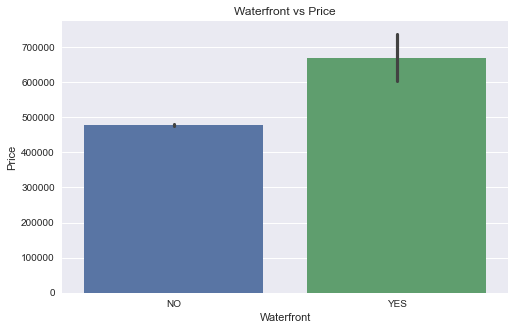

In [66]:
# Bar plot of waterfront vs price
plt.figure(figsize=(8, 5))
sns.barplot(x='waterfront', y='price', data=df1)
plt.title('Waterfront vs Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

**Bar Plot (Waterfront vs Price):**
 - This plot compares the average price of houses with and without waterfront views.
 - The x-axis represents the presence of a waterfront view (0 for No, 1 for Yes), and the y-axis represents the average price.
 - The bar corresponding to houses with waterfront views is higher, indicating that, on average, houses with waterfront views have higher prices compared to those without.

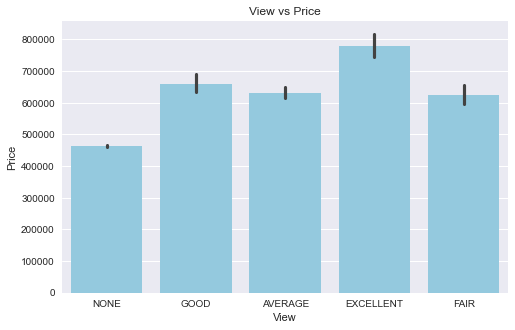

In [67]:
# Bar plot of view vs price
plt.figure(figsize=(8, 5))
sns.barplot(x='view', y='price', color = 'skyblue', data=df1)
plt.title('View vs Price')
plt.xlabel('View')
plt.ylabel('Price')
plt.show()

**Bar Plot (View vs Average Price):**
    
 - This plot shows the average price of houses based on the view they offer.
 - The x-axis represents the view quality, and the y-axis represents the average price.
 - It helps understand how the quality of the view impacts the price of the houses. Thus houses with excellent views have higher prices as compared to those without

# Modeling